In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [38]:
def sdfNorm(point, center, zero_radius, norm=2):
    # Calculate the signed distance of a point from the set
    # Replace this with your actual signed distance function implementation

    eval = np.zeros(point.shape[0])

    eval = np.linalg.vector_norm(point-center,axis=1,ord=2) - zero_radius

    return eval


def empiricalCDFGen(sdf,samples,eval):
    # Calculate the empirical CDF of the signed distance function
    # This is a simple wrapper around the numpy function


    return np.sum(sdf(samples,eval) <= 0)/samples.shape[0]


def findZeroOneCDF(cdfFunction,startPt,tol):
    # Determine where the CDF hits 0 and 1.

    zeroOne = np.zeros(2)

    # Find the zero crossing
    zeroOne[0] = optimize.root_scalar(cdfFunction, x0=startPt, x1=startPt+1, xtol=tol).root
    complementZero = lambda x: 1-cdfFunction(x)
    zeroOne[1] = optimize.root_scalar(complementZero, x0=startPt, x1=startPt-1, xtol=tol).root

    return zeroOne

def findLevelSet(cdfFunction,zeroOne,prob):
    # Find the level set of the CDF that corresponds to the zero radius
    # This is a simple wrapper around the optimization function

    levelCDF = lambda x: cdfFunction(x) - prob

    return optimize.bisect(levelCDF, zeroOne[0], zeroOne[1])


def plot2DNormLevelSet(center,zero_radius,samples):

    # Generate samples within the norm-ball
    theta = np.linspace(0, 2*np.pi, 100)
    x = center[0] + zero_radius * np.cos(theta)
    y = center[1] + zero_radius * np.sin(theta)

    # Plot the norm-ball
    plt.plot(x, y, color='blue', label='Norm-Ball')

    # Plot the samples
    plt.scatter(samples[:, 0], samples[:, 1], color='red', label='Samples')

    # Set plot labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    # Set the aspect ratio of the plot to 'equal'
    plt.axis('equal')

    # Show the plot
    plt.show()

def histogramPlot(empiricalCDF,eval,zero_radius,prob):

    eCDF = np.zeros(eval.shape[0])

    # Generate the histogram of the signed distance function
    for i in range(0,eval.shape[0]):
        eCDF[i] = empiricalCDF(eval[i])

    # Plot the histogram
    plt.plot(eval, eCDF, color='blue', label='Empirical CDF')
    plt.axvline(x=zero_radius,ymin=0, ymax=1, color='red', label='Probabilistic Level Set')
    plt.axhline(y=prob, color='green', label='Desired Probability')

    # Set plot labels
    plt.xlabel('Signed Distance Function')
    plt.ylabel('Frequency')
    plt.legend()

    # Show the plot
    plt.show()


/tmp/ipykernel_1895893/71923378.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, cov, num_samples)


[5.54140548e-03 1.15164969e+01]
11.312796146948983
0.9999886234033658


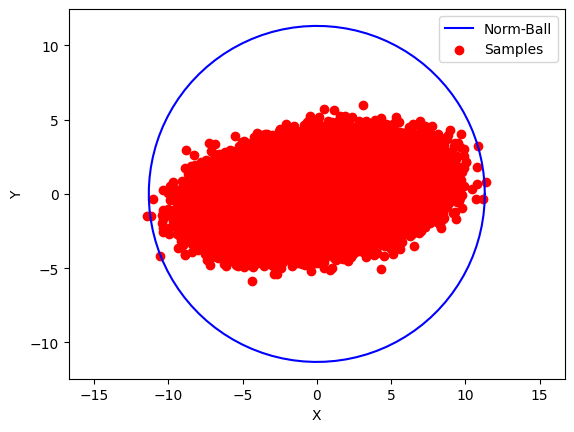

In [39]:
# Mean vector
mean = np.array([0, 0])

# Covariance matrix
cov = np.array([[1.2, 0.5], [0.5, 1.5]])

alpha = 0.99
epsilon = 0.001
# Number of samples
num_samples = np.ceil(-np.log(alpha / 2) / (2 * epsilon**2)).astype(int)

# Generate samples
samples = np.random.multivariate_normal(mean, cov, num_samples)

# Center of the norm-ball
center = np.array([0, 0])

# Set up function for the signed distance function

sdf = lambda samples,zero_radius: sdfNorm(samples, center, zero_radius)

empiricalCDF = lambda eval: empiricalCDFGen(sdf,samples,eval)

zeroOne = findZeroOneCDF(empiricalCDF,1.2,1E-6)
levelProb = 0.99999
levelSetZeroRadius = findLevelSet(empiricalCDF,zeroOne,levelProb)

print(zeroOne)
print(levelSetZeroRadius)
print(empiricalCDF(levelSetZeroRadius))

plot2DNormLevelSet(center,levelSetZeroRadius,samples)


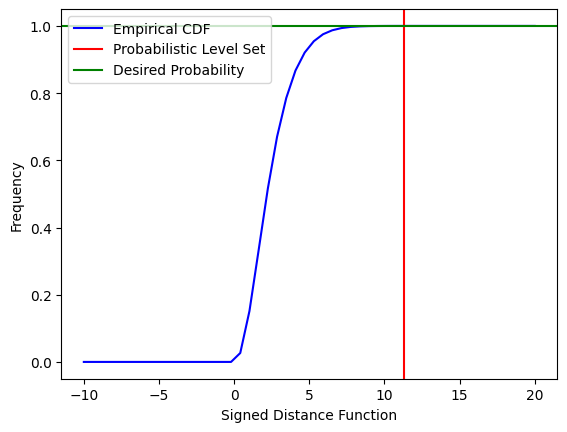

In [40]:
evalPts = np.linspace(-10,20,50)
histogramPlot(empiricalCDF,evalPts,levelSetZeroRadius,levelProb)